## Introduction to Data Science - CS 675.

## Inamdar Ali

## Final Project - Times Series Forecasting

Importing all libraries:

In [23]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

Importing the dataset and converting into a data frame using pandas.

In [127]:
data1 = pd.read_csv('//content/Electric_Consumption_And_Cost__2010_-_Feb_2023__20241125.csv')

<ipython-input-127-6e441cd40caf>:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv('//content/Electric_Consumption_And_Cost__2010_-_Feb_2023__20241125.csv')


In [128]:
data1

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
0,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,15396.82,GOV/NYC/068,Yes,128800.0,7387.97,216.00,2808.00,5200.85
1,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,14556.34,GOV/NYC/068,Yes,115200.0,6607.87,224.00,2912.00,5036.47
2,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,13904.98,GOV/NYC/068,Yes,103200.0,5919.55,216.00,2808.00,5177.43
3,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,14764.04,GOV/NYC/068,Yes,105600.0,6057.22,208.00,2704.00,6002.82
4,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,13729.54,GOV/NYC/068,Yes,97600.0,5598.34,216.00,2808.00,5323.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447844,WYCKOFF GARDENS,BROOKLYN,WYCKOFF GARDENS,BLD 03,INTERVAL,NaN,163.0,272,K016300,FEDERAL,...,1786584,N,3342.30,GOV/NYC/068,Yes,0.0,0.00,144.60,1590.60,1751.70
447845,WYCKOFF GARDENS,BROOKLYN,WYCKOFF GARDENS,BLD 03,INTERVAL,NaN,163.0,272,K016300,FEDERAL,...,1786586,N,3755.58,GOV/NYC/068,Yes,0.0,0.00,162.48,1787.28,1968.30
447846,WYCKOFF GARDENS,BROOKLYN,WYCKOFF GARDENS,BLD 02,AMR,NaN,163.0,272,K016300,FEDERAL,...,2786583,N,9092.54,GOV/NYC/068,Yes,82800.0,4327.13,0.00,0.00,4765.41
447847,WYCKOFF GARDENS,BROOKLYN,WYCKOFF GARDENS,BLD 03,AMR,NaN,163.0,272,K016300,FEDERAL,...,2786584,N,9927.14,GOV/NYC/068,Yes,90400.0,4724.31,0.00,0.00,5202.83


## Data PreProcessing , cleaning and Wrangling.

In [100]:
data1.columns

Index(['Development Name', 'Borough', 'Account Name', 'Location', 'Meter AMR',
       'Meter Scope', 'TDS #', 'EDP', 'RC Code', 'Funding Source', 'AMP #',
       'Vendor Name', 'UMIS BILL ID', 'Revenue Month', 'Service Start Date',
       'Service End Date', '# days', 'Meter Number', 'Estimated',
       'Current Charges', 'Rate Class', 'Bill Analyzed', 'Consumption (KWH)',
       'KWH Charges', 'Consumption (KW)', 'KW Charges', 'Other charges'],
      dtype='object')

In [26]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447849 entries, 0 to 447848
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Development Name    446368 non-null  object 
 1   Borough             447849 non-null  object 
 2   Account Name        447849 non-null  object 
 3   Location            436128 non-null  object 
 4   Meter AMR           447622 non-null  object 
 5   Meter Scope         23867 non-null   object 
 6   TDS #               445111 non-null  float64
 7   EDP                 447849 non-null  int64  
 8   RC Code             447849 non-null  object 
 9   Funding Source      447849 non-null  object 
 10  AMP #               445962 non-null  object 
 11  Vendor Name         447849 non-null  object 
 12  UMIS BILL ID        447849 non-null  int64  
 13  Revenue Month       447849 non-null  object 
 14  Service Start Date  447841 non-null  object 
 15  Service End Date    447841 non-nul

In [27]:
data1.columns

Index(['Development Name', 'Borough', 'Account Name', 'Location', 'Meter AMR',
       'Meter Scope', 'TDS #', 'EDP', 'RC Code', 'Funding Source', 'AMP #',
       'Vendor Name', 'UMIS BILL ID', 'Revenue Month', 'Service Start Date',
       'Service End Date', '# days', 'Meter Number', 'Estimated',
       'Current Charges', 'Rate Class', 'Bill Analyzed', 'Consumption (KWH)',
       'KWH Charges', 'Consumption (KW)', 'KW Charges', 'Other charges'],
      dtype='object')

In [28]:
data1.describe()

,TDS #,EDP,UMIS BILL ID,# days,Current Charges,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
count,445111.000000,447849.000000,4.478490e+05,447841.000000,4.478490e+05,4.478490e+05,4.478490e+05,447849.000000,447849.000000,4.478490e+05
mean,117.512099,425.015438,6.355232e+06,30.447960,4.277735e+03,3.115645e+04,1.431691e+03,63.944056,903.329622,1.942714e+03
std,128.881800,186.965308,3.209486e+06,1.898483,8.071365e+03,4.896050e+04,3.468343e+03,627.156668,1567.021090,4.679456e+03
min,1.000000,63.000000,1.726303e+06,1.000000,-1.068744e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,-5.939643e+04
25%,33.000000,225.000000,3.543961e+06,29.000000,6.275200e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
50%,64.000000,426.000000,5.658874e+06,30.000000,2.313950e+03,1.340000e+04,5.664600e+02,23.940000,288.050000,9.768900e+02
75%,150.000000,555.000000,9.282883e+06,32.000000,5.606110e+03,4.608000e+04,2.034260e+03,90.340000,1323.160000,2.822310e+03
max,582.000000,999.000000,1.224390e+07,396.000000,3.551569e+06,1.779600e+06,1.652807e+06,329074.000000,137814.280000,1.898762e+06


In [29]:
data1.rename(columns={"Service Start Date": "ds", "Consumption (KWH)": "y"}, inplace=True)

In [30]:
print("\nChecking for Missing Values:")
print(data1.isnull().sum())


Checking for Missing Values:
Development Name      1481
Borough                  0
Account Name             0
Location             11721
Meter AMR              227
Meter Scope         423982
TDS #                 2738
EDP                      0
RC Code                  0
Funding Source           0
AMP #                 1887
Vendor Name              0
UMIS BILL ID             0
Revenue Month            0
ds                       8
Service End Date         8
# days                   8
Meter Number             0
Estimated              342
Current Charges          0
Rate Class               0
Bill Analyzed            0
y                        0
KWH Charges              0
Consumption (KW)         0
KW Charges               0
Other charges            0
dtype: int64


In [31]:
numerical_data = data1.select_dtypes(include=np.number)

In [32]:
# Convert 'ds' column to datetime objects
data1['ds'] = pd.to_datetime(data1['ds'])

## Exploratory Data Analysis:

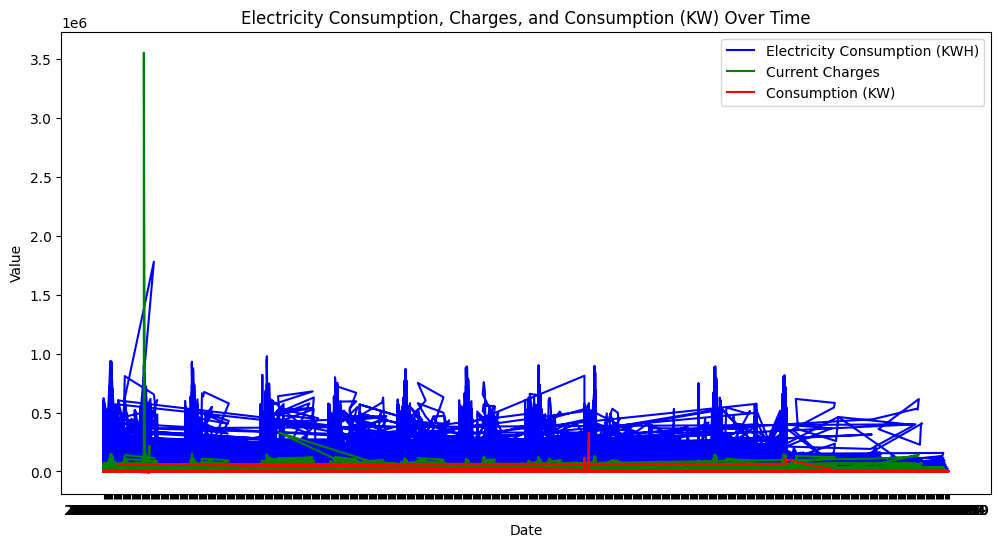

In [33]:
plt.figure(figsize=(12, 6))

# Convert 'ds' column to strings for plotting
# Assuming 'ds' column contains datetime objects, format them as strings
# If 'ds' contains numerical representations, adjust the formatting accordingly
# Convert the x-axis values to strings explicitly
x_values = data1["ds"].dt.strftime('%Y-%m-%d').astype(str)

plt.plot(x_values, data1["y"], label="Electricity Consumption (KWH)", color="blue")
plt.plot(x_values, data1['Current Charges'], label="Current Charges", color="green")
plt.plot(x_values, data1["Consumption (KW)"], label="Consumption (KW)", color="red")

plt.title("Electricity Consumption, Charges, and Consumption (KW) Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

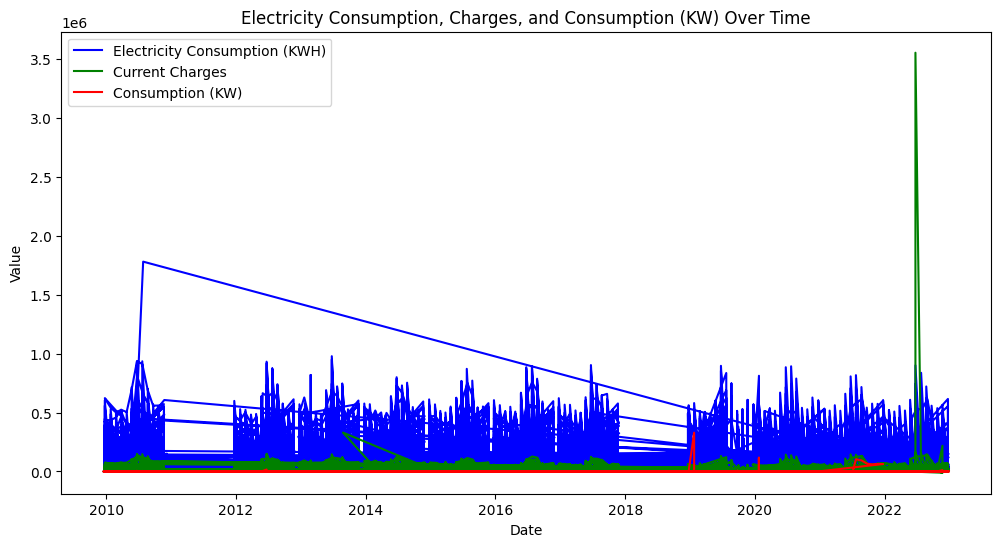

In [35]:
# Plot the time series of other key variables
plt.figure(figsize=(12, 6))
plt.plot(data1["ds"], data1["y"], label="Electricity Consumption (KWH)", color="blue")
plt.plot(data1["ds"], data1['Current Charges'], label="Current Charges", color="green")
plt.plot(data1["ds"], data1["Consumption (KW)"], label="Consumption (KW)", color="red")
plt.title("Electricity Consumption, Charges, and Consumption (KW) Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

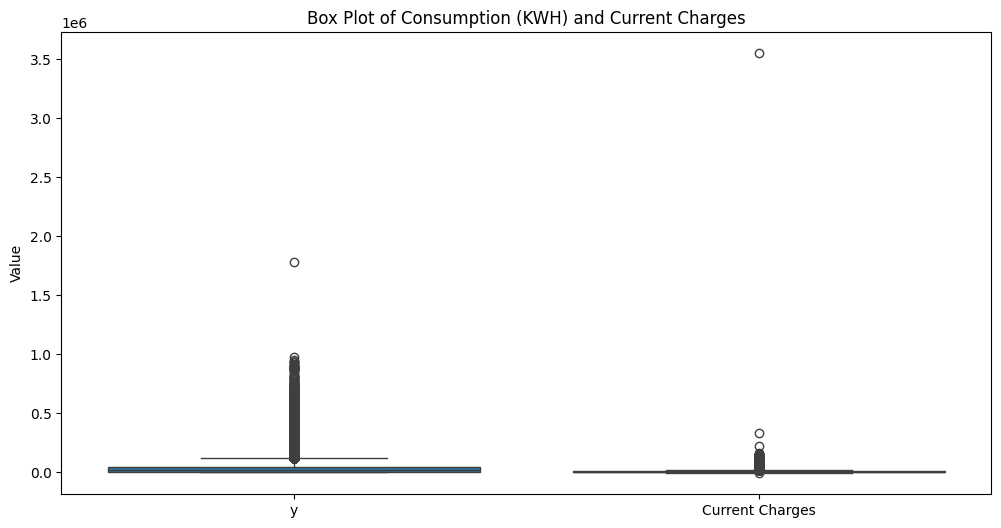

In [36]:
# Box plot for detecting outliers in "Consumption (KWH)" and "Current Charges"
plt.figure(figsize=(12, 6))
sns.boxplot(data=data1[["y", 'Current Charges']])
plt.title("Box Plot of Consumption (KWH) and Current Charges")
plt.ylabel("Value")
plt.show()

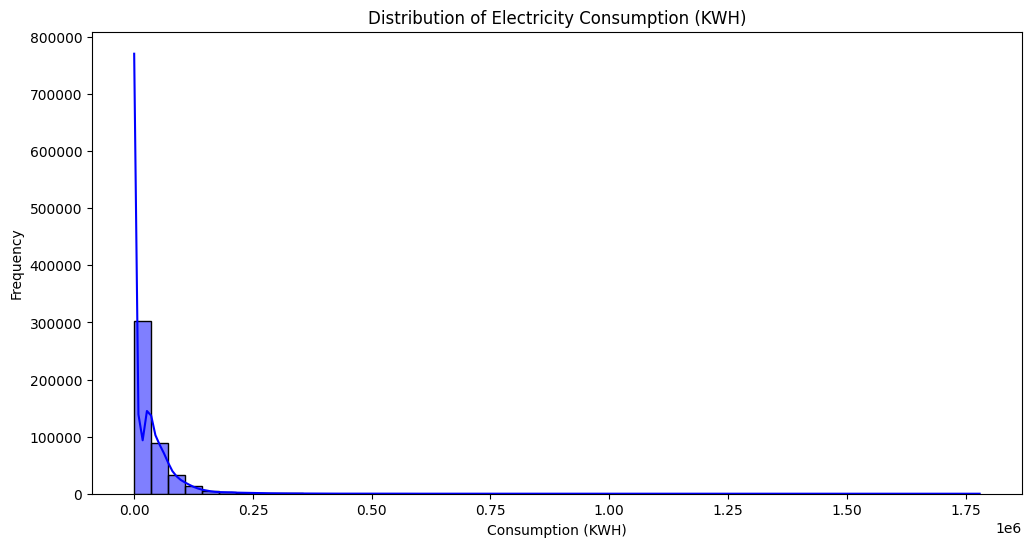

In [38]:
# Distribution of "Consumption (KWH)" to check the skewness
plt.figure(figsize=(12, 6))
sns.histplot(data1["y"], bins=50, kde=True, color="blue")
plt.title("Distribution of Electricity Consumption (KWH)")
plt.xlabel("Consumption (KWH)")
plt.ylabel("Frequency")
plt.show()

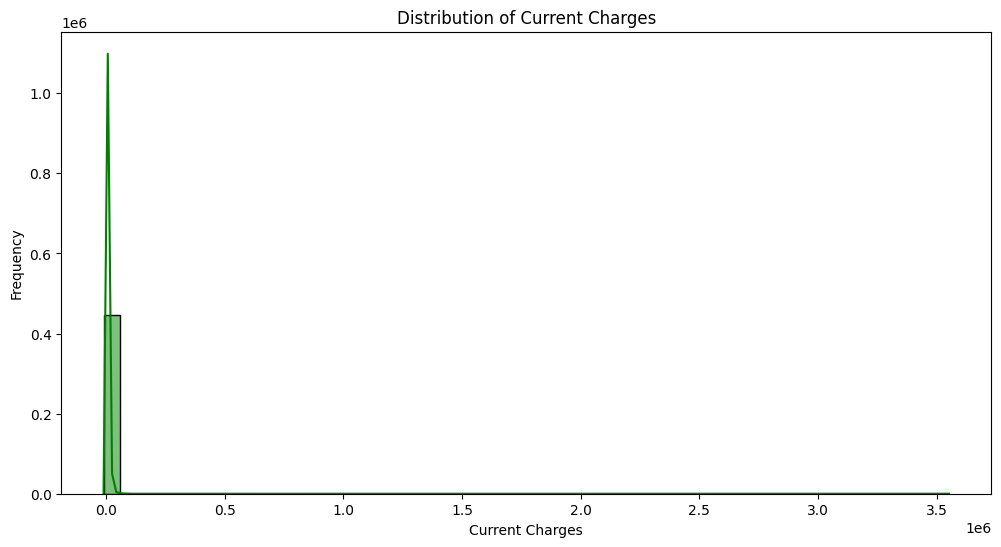

In [39]:
# Distribution of "Current Charges"
plt.figure(figsize=(12, 6))
sns.histplot(data1["Current Charges"], bins=50, kde=True, color="green")
plt.title("Distribution of Current Charges")
plt.xlabel("Current Charges")
plt.ylabel("Frequency")
plt.show()

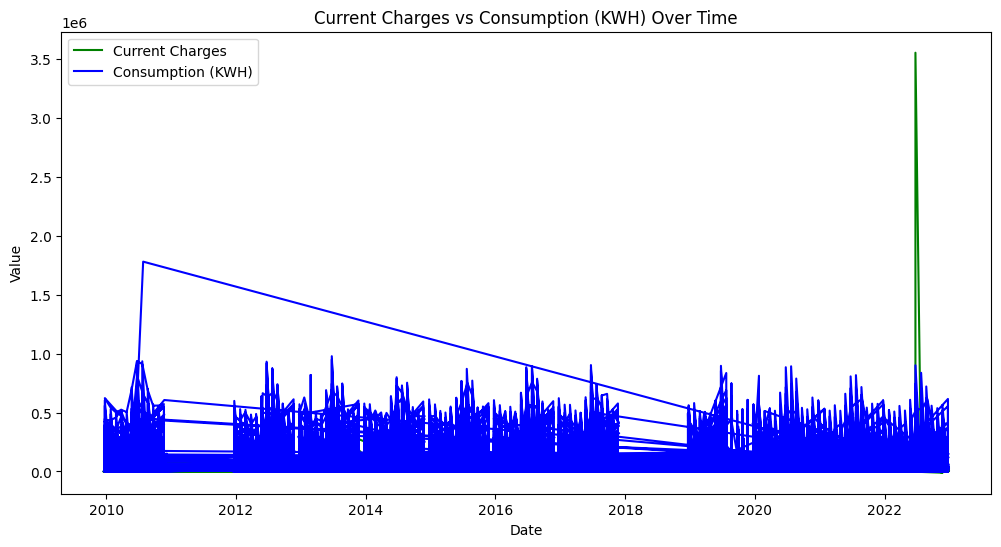

In [40]:
# Time series of "Current Charges" vs "Consumption (KWH)"
plt.figure(figsize=(12, 6))
plt.plot(data1["ds"], data1["Current Charges"], label="Current Charges", color="green")
plt.plot(data1["ds"], data1["y"], label="Consumption (KWH)", color="blue")
plt.title("Current Charges vs Consumption (KWH) Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

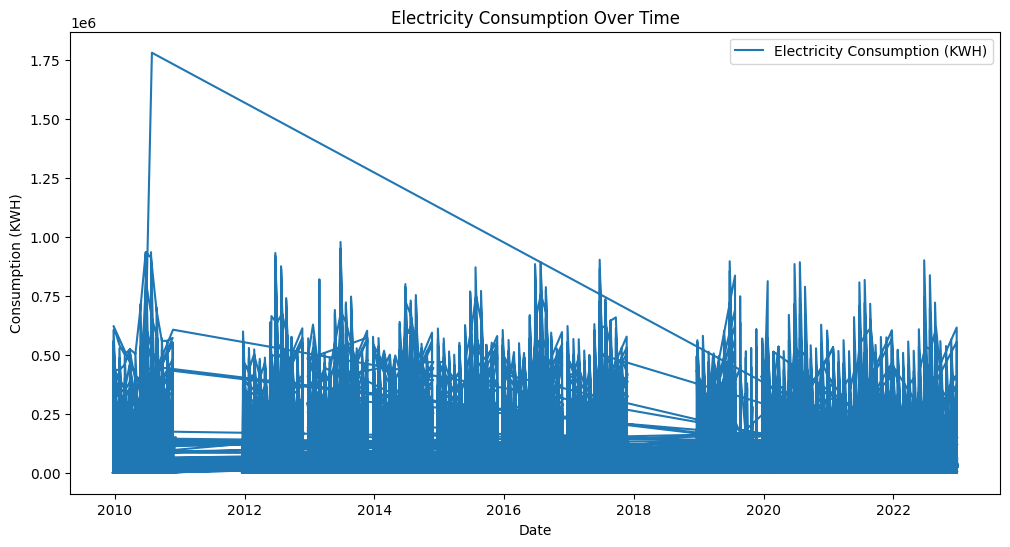

In [41]:
# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(data1["ds"], data1["y"], label="Electricity Consumption (KWH)")
plt.title("Electricity Consumption Over Time")
plt.xlabel("Date")
plt.ylabel("Consumption (KWH)")
plt.legend()
plt.show()


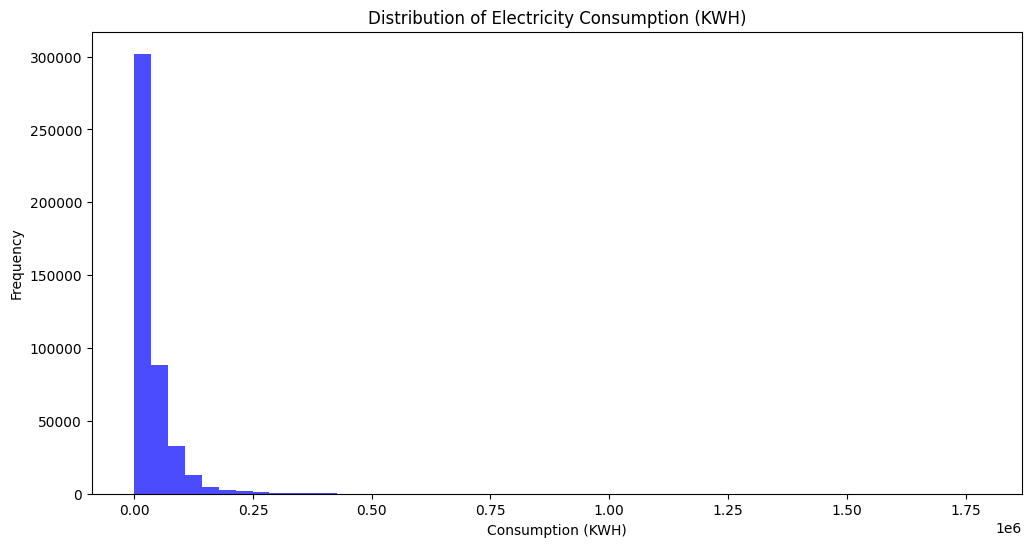

In [42]:
# Plotting distribution of values
plt.figure(figsize=(12, 6))
plt.hist(data1["y"], bins=50, color="blue", alpha=0.7)
plt.title("Distribution of Electricity Consumption (KWH)")
plt.xlabel("Consumption (KWH)")
plt.ylabel("Frequency")
plt.show()

## FBProphet Model:

In [43]:
# Determine the time unit of the dataset
date_diff = (data1["ds"].iloc[1] - data1["ds"].iloc[0]).days
time_unit = "daily" if date_diff == 1 else "monthly" if 28 <= date_diff <= 31 else "yearly"

In [44]:
data1['ds'] = pd.to_datetime(data1['ds'])

In [45]:
# Aggregate the dataset by specified time unit, excluding non-numeric columns
if time_unit == "monthly":
    data1 = data1.resample("M", on="ds")[['y']].mean().reset_index()  # Select only 'y'
elif time_unit == "yearly":
    data1 = data1.resample("Y", on="ds")[['y']].mean().reset_index()  # Select only 'y'

<ipython-input-45-201b25c1d1a8>:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  data1 = data1.resample("Y", on="ds")[['y']].mean().reset_index()  # Select only 'y'


In [46]:

# Train Prophet model and forecast future data1
future_periods = 365 if time_unit == "daily" else 9 if time_unit == "monthly" else 20
model = Prophet()


In [47]:
# Add manual seasonality based on time unit
if time_unit == "daily":
    model.add_seasonality(name="daily_seasonality", period=1, fourier_order=3)
elif time_unit == "monthly":
    model.add_seasonality(name="monthly_seasonality", period=30.5, fourier_order=5)
elif time_unit == "yearly":
    model.add_seasonality(name="yearly_seasonality", period=365.25, fourier_order=10)

Fitting the model

In [48]:
model.fit(data1)
future = model.make_future_dataframe(periods=future_periods, freq={"daily": "D", "monthly": "M", "yearly": "Y"}[time_unit])
forecast = model.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc4chj056/4ddaxnkj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc4chj056/4dfypm9z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33311', 'data', 'file=/tmp/tmpc4chj056/4ddaxnkj.json', 'init=/tmp/tmpc4chj056/4dfypm9z.json', 'output', 'file=/tmp/tmpc4chj056/prophet_model82n0qqvw/prophet_model-20241210072126.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:21:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:

Evaluating the model

In [49]:
# Evaluate model performance
mae = mean_absolute_error(data1["y"], forecast["yhat"][:len(data1)])
mape = mean_absolute_percentage_error(data1["y"], forecast["yhat"][:len(data1)])
r2 = r2_score(data1["y"], forecast["yhat"][:len(data1)])
print(f"Model Evaluation:\nMAE: {mae}\nMAPE: {mape}\nR^2: {r2}")

Model Evaluation:
MAE: 2381.8286576374376
MAPE: 0.07225210585297313
R^2: 0.7668512361770181


Printing the results:

In [50]:
#Printing the dredicted values
print("Forecasted Values:")
print(forecast[["ds", "yhat"]])

Forecasted Values:
           ds          yhat
0  2009-12-31  41234.564518
1  2010-12-31  39659.498957
2  2011-12-31  37502.196520
3  2012-12-31  37228.847826
4  2013-12-31  36236.395555
5  2014-12-31  34661.424534
6  2015-12-31  32504.456963
7  2016-12-31  32231.705624
8  2017-12-31  31239.915278
9  2018-12-31  29666.064829
10 2019-12-31  27509.977506
11 2020-12-31  27237.847261
12 2021-12-31  26246.610099
13 2022-12-31  24672.759656
14 2023-12-31  22516.672338
15 2024-12-31  22244.542093
16 2025-12-31  21253.304930
17 2026-12-31  19679.454488
18 2027-12-31  17523.367169
19 2028-12-31  17251.236925
20 2029-12-31  16259.999762
21 2030-12-31  14686.149320
22 2031-12-31  12530.062001
23 2032-12-31  12257.931756
24 2033-12-31  11266.694594
25 2034-12-31   9692.844151
26 2035-12-31   7536.756833
27 2036-12-31   7264.626588
28 2037-12-31   6273.389425
29 2038-12-31   4699.538983
30 2039-12-31   2543.451664
31 2040-12-31   2271.321420
32 2041-12-31   1280.084257
33 2042-12-31   -293.766185


Graphical representation of the results and predictions:

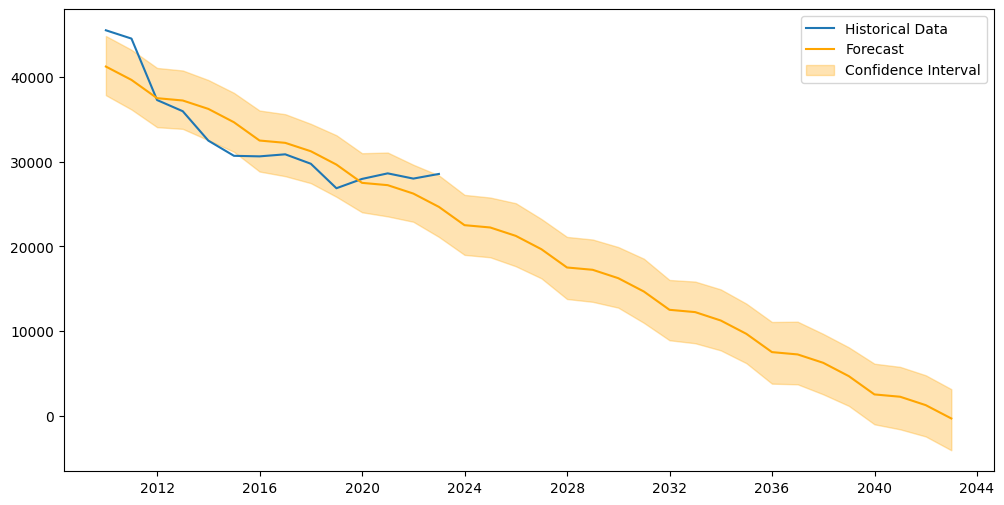

In [51]:
# Plot historical and forecasted data1
plt.figure(figsize=(12, 6))
plt.plot(data1["ds"], data1["y"], label="Historical Data")
plt.plot(forecast["ds"], forecast["yhat"], label="Forecast", color="orange")
plt.fill_between(forecast["ds"], forecast["yhat_lower"], forecast["yhat_upper"], color="orange", alpha=0.3, label="Confidence Interval")
plt.legend()
plt.show()

In [52]:
# Define forecast periods for 1, 10, and 20 years
forecast_periods = {
    "daily": [365, 3650, 7300],  # 1 year, 10 years, 20 years in days
    "monthly": [12, 120, 240],   # 1 year, 10 years, 20 years in months
    "yearly": [1, 10, 20]        # 1 year, 10 years, 20 years in years
}

In [53]:
# Select the appropriate periods based on the time unit
if time_unit == "daily":
    periods_1_year, periods_10_years, periods_20_years = forecast_periods["daily"]
elif time_unit == "monthly":
    periods_1_year, periods_10_years, periods_20_years = forecast_periods["monthly"]
elif time_unit == "yearly":
    periods_1_year, periods_10_years, periods_20_years = forecast_periods["yearly"]


In [54]:
# Initialize the Prophet model
model1 = Prophet()

In [55]:
# Add seasonality based on time unit
if time_unit == "daily":
    model1.add_seasonality(name="daily_seasonality", period=1, fourier_order=3)
elif time_unit == "monthly":
    model1.add_seasonality(name="monthly_seasonality", period=30.5, fourier_order=5)
elif time_unit == "yearly":
    model1.add_seasonality(name="yearly_seasonality", period=365.25, fourier_order=10)

In [56]:
# Fit the model to the data
model1.fit(data1)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc4chj056/lm0phtuf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc4chj056/yxiwx2_0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16330', 'data', 'file=/tmp/tmpc4chj056/lm0phtuf.json', 'init=/tmp/tmpc4chj056/yxiwx2_0.json', 'output', 'file=/tmp/tmpc4chj056/prophet_modelch_2weh4/prophet_model-20241210072135.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:21:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:

In [57]:
# Forecast for 1, 10, and 20 years
future_1_year = model.make_future_dataframe(periods=periods_1_year, freq={"daily": "D", "monthly": "M", "yearly": "Y"}[time_unit])
forecast_1_year = model.predict(future_1_year)

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


Forecast for 10 years:

In [58]:
#printing forecast for 10 years
print("Forecast for 10 Years:")
print(forecast_1_year[["ds", "yhat"]])

Forecast for 10 Years:
           ds          yhat
0  2009-12-31  41234.564518
1  2010-12-31  39659.498957
2  2011-12-31  37502.196520
3  2012-12-31  37228.847826
4  2013-12-31  36236.395555
5  2014-12-31  34661.424534
6  2015-12-31  32504.456963
7  2016-12-31  32231.705624
8  2017-12-31  31239.915278
9  2018-12-31  29666.064829
10 2019-12-31  27509.977506
11 2020-12-31  27237.847261
12 2021-12-31  26246.610099
13 2022-12-31  24672.759656
14 2023-12-31  22516.672338


In [59]:
future_10_years = model.make_future_dataframe(periods=periods_10_years, freq={"daily": "D", "monthly": "M", "yearly": "Y"}[time_unit])
forecast_10_years = model.predict(future_10_years)


/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


Forecast for 10 years:

In [60]:
#Printing forcast for 10 years
print("Forecast for 10 Years:")
print(forecast_10_years[["ds", "yhat"]])

Forecast for 10 Years:
           ds          yhat
0  2009-12-31  41234.564518
1  2010-12-31  39659.498957
2  2011-12-31  37502.196520
3  2012-12-31  37228.847826
4  2013-12-31  36236.395555
5  2014-12-31  34661.424534
6  2015-12-31  32504.456963
7  2016-12-31  32231.705624
8  2017-12-31  31239.915278
9  2018-12-31  29666.064829
10 2019-12-31  27509.977506
11 2020-12-31  27237.847261
12 2021-12-31  26246.610099
13 2022-12-31  24672.759656
14 2023-12-31  22516.672338
15 2024-12-31  22244.542093
16 2025-12-31  21253.304930
17 2026-12-31  19679.454488
18 2027-12-31  17523.367169
19 2028-12-31  17251.236925
20 2029-12-31  16259.999762
21 2030-12-31  14686.149320
22 2031-12-31  12530.062001
23 2032-12-31  12257.931756


Forecast for 20 years:

In [61]:
future_20_years = model.make_future_dataframe(periods=periods_20_years, freq={"daily": "D", "monthly": "M", "yearly": "Y"}[time_unit])
forecast_20_years = model.predict(future_20_years)

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


In [62]:
#printing forecast for 20 years
print("Forecast for 20 Years:")
print(forecast_20_years[["ds", "yhat"]])

Forecast for 20 Years:
           ds          yhat
0  2009-12-31  41234.564518
1  2010-12-31  39659.498957
2  2011-12-31  37502.196520
3  2012-12-31  37228.847826
4  2013-12-31  36236.395555
5  2014-12-31  34661.424534
6  2015-12-31  32504.456963
7  2016-12-31  32231.705624
8  2017-12-31  31239.915278
9  2018-12-31  29666.064829
10 2019-12-31  27509.977506
11 2020-12-31  27237.847261
12 2021-12-31  26246.610099
13 2022-12-31  24672.759656
14 2023-12-31  22516.672338
15 2024-12-31  22244.542093
16 2025-12-31  21253.304930
17 2026-12-31  19679.454488
18 2027-12-31  17523.367169
19 2028-12-31  17251.236925
20 2029-12-31  16259.999762
21 2030-12-31  14686.149320
22 2031-12-31  12530.062001
23 2032-12-31  12257.931756
24 2033-12-31  11266.694594
25 2034-12-31   9692.844151
26 2035-12-31   7536.756833
27 2036-12-31   7264.626588
28 2037-12-31   6273.389425
29 2038-12-31   4699.538983
30 2039-12-31   2543.451664
31 2040-12-31   2271.321420
32 2041-12-31   1280.084257
33 2042-12-31   -293.7661

Displaying all prediction 1, 10 and 20 years

In [63]:
# Displaying the predictions
print("Forecast for 1 Year:")
print(forecast_1_year[["ds", "yhat"]].tail())

Forecast for 1 Year:
           ds          yhat
10 2019-12-31  27509.977506
11 2020-12-31  27237.847261
12 2021-12-31  26246.610099
13 2022-12-31  24672.759656
14 2023-12-31  22516.672338


In [64]:
# Display predictions for 10 years
print("\nForecast for 10 Years:")
print(forecast_10_years[["ds", "yhat"]].tail())


Forecast for 10 Years:
           ds          yhat
19 2028-12-31  17251.236925
20 2029-12-31  16259.999762
21 2030-12-31  14686.149320
22 2031-12-31  12530.062001
23 2032-12-31  12257.931756


In [65]:
# Display predictions for 20 years
print("\nForecast for 20 Years:")
print(forecast_20_years[["ds", "yhat"]].tail())


Forecast for 20 Years:
           ds         yhat
29 2038-12-31  4699.538983
30 2039-12-31  2543.451664
31 2040-12-31  2271.321420
32 2041-12-31  1280.084257
33 2042-12-31  -293.766185


Graphical representation of forecast for 1, 10 and 20 years:

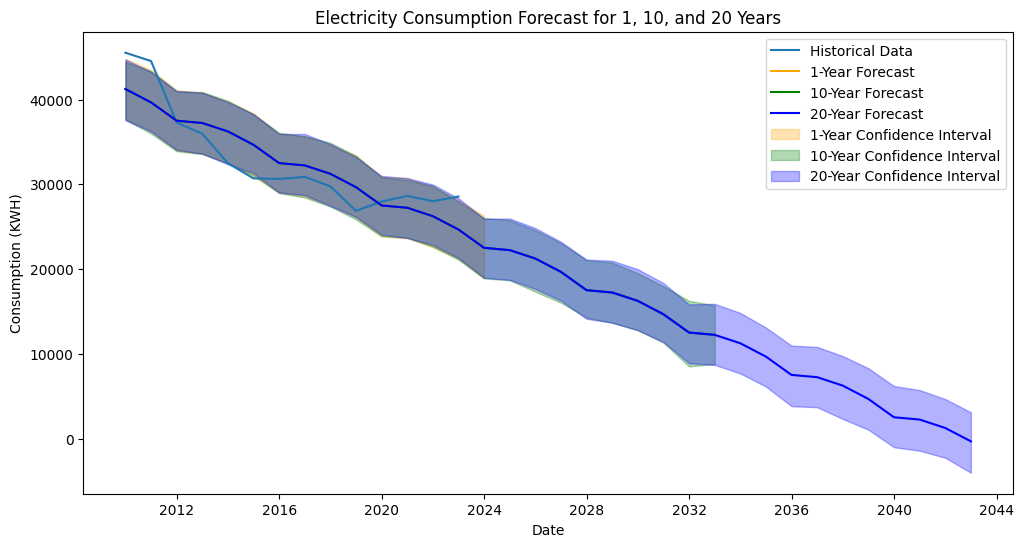

In [66]:
# Plot forecasts for 1, 10, and 20 years
plt.figure(figsize=(12, 6))
plt.plot(data1["ds"], data1["y"], label="Historical Data")
plt.plot(forecast_1_year["ds"], forecast_1_year["yhat"], label="1-Year Forecast", color="orange")
plt.plot(forecast_10_years["ds"], forecast_10_years["yhat"], label="10-Year Forecast", color="green")
plt.plot(forecast_20_years["ds"], forecast_20_years["yhat"], label="20-Year Forecast", color="blue")

plt.fill_between(forecast_1_year["ds"], forecast_1_year["yhat_lower"], forecast_1_year["yhat_upper"], color="orange", alpha=0.3, label="1-Year Confidence Interval")
plt.fill_between(forecast_10_years["ds"], forecast_10_years["yhat_lower"], forecast_10_years["yhat_upper"], color="green", alpha=0.3, label="10-Year Confidence Interval")
plt.fill_between(forecast_20_years["ds"], forecast_20_years["yhat_lower"], forecast_20_years["yhat_upper"], color="blue", alpha=0.3, label="20-Year Confidence Interval")

plt.legend()
plt.title(f"Electricity Consumption Forecast for 1, 10, and 20 Years")
plt.xlabel("Date")
plt.ylabel("Consumption (KWH)")
plt.show()

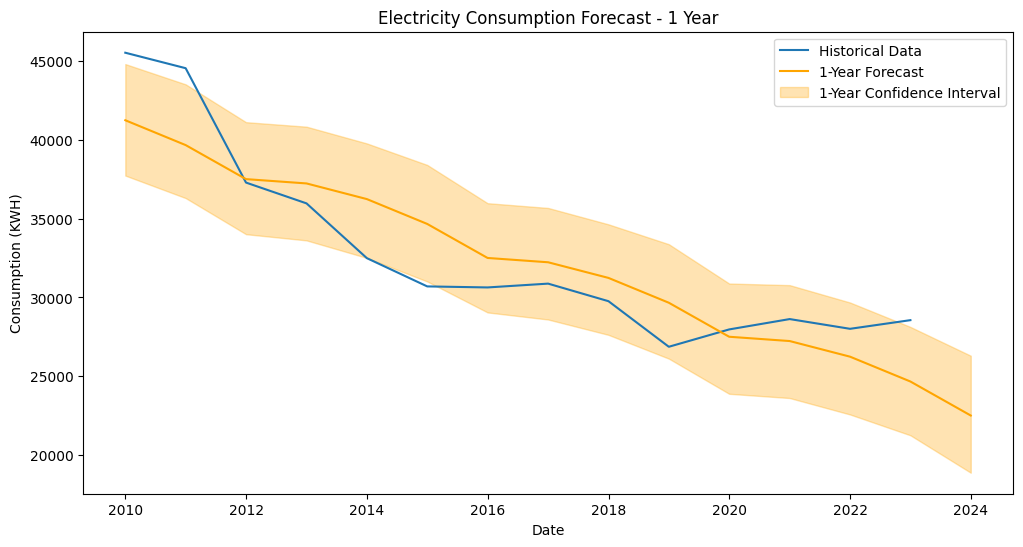

In [67]:
# Plot 1-Year Forecast
plt.figure(figsize=(12, 6))
plt.plot(data1["ds"], data1["y"], label="Historical Data")
plt.plot(forecast_1_year["ds"], forecast_1_year["yhat"], label="1-Year Forecast", color="orange")
plt.fill_between(forecast_1_year["ds"], forecast_1_year["yhat_lower"], forecast_1_year["yhat_upper"], color="orange", alpha=0.3, label="1-Year Confidence Interval")
plt.legend()
plt.title("Electricity Consumption Forecast - 1 Year")
plt.xlabel("Date")
plt.ylabel("Consumption (KWH)")
plt.show()

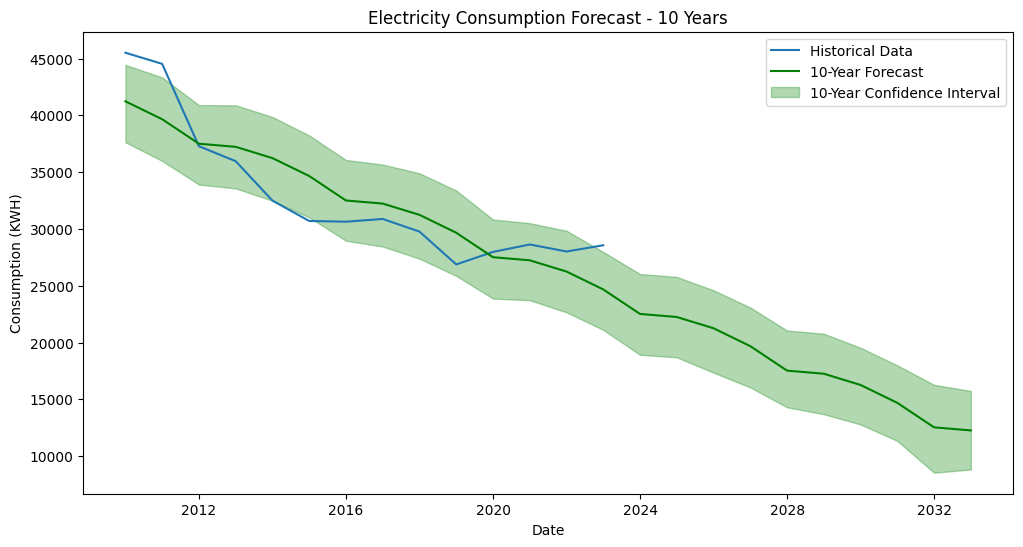

In [68]:

# Plot 10-Year Forecast
plt.figure(figsize=(12, 6))
plt.plot(data1["ds"], data1["y"], label="Historical Data")
plt.plot(forecast_10_years["ds"], forecast_10_years["yhat"], label="10-Year Forecast", color="green")
plt.fill_between(forecast_10_years["ds"], forecast_10_years["yhat_lower"], forecast_10_years["yhat_upper"], color="green", alpha=0.3, label="10-Year Confidence Interval")
plt.legend()
plt.title("Electricity Consumption Forecast - 10 Years")
plt.xlabel("Date")
plt.ylabel("Consumption (KWH)")
plt.show()


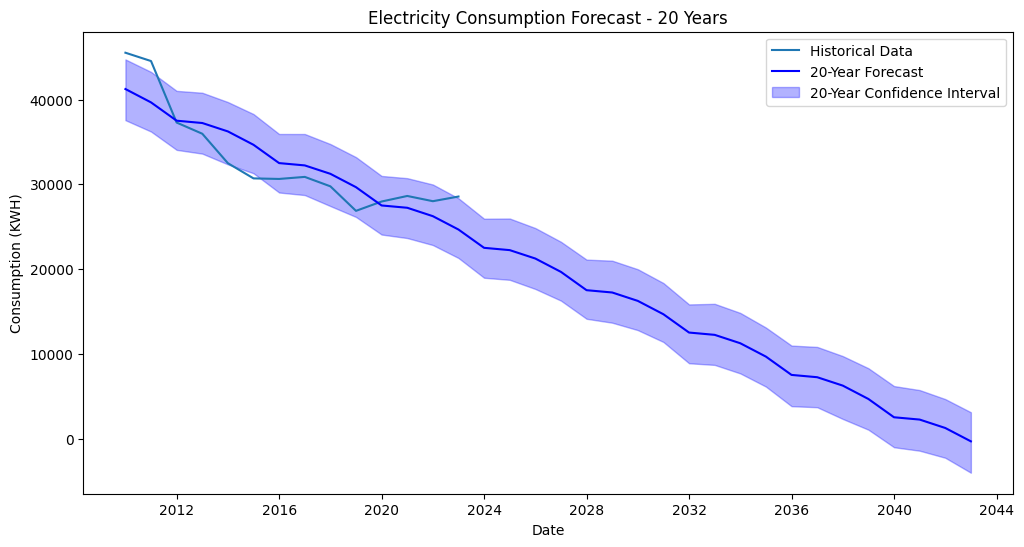

In [69]:
# Plot 20-Year Forecast
plt.figure(figsize=(12, 6))
plt.plot(data1["ds"], data1["y"], label="Historical Data")
plt.plot(forecast_20_years["ds"], forecast_20_years["yhat"], label="20-Year Forecast", color="blue")
plt.fill_between(forecast_20_years["ds"], forecast_20_years["yhat_lower"], forecast_20_years["yhat_upper"], color="blue", alpha=0.3, label="20-Year Confidence Interval")
plt.legend()
plt.title("Electricity Consumption Forecast - 20 Years")
plt.xlabel("Date")
plt.ylabel("Consumption (KWH)")
plt.show()

## Extra credit:

## Forecasting for all 5 boroughs individually

In [74]:
# List of the 5 boroughs in NYC
boroughs = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']


In [75]:
# Initialize an empty dictionary to store results for each borough
results = {}

In [103]:
# List of boroughs
boroughs = data1['Borough'].unique()

In [131]:
data1.rename(columns={"Service Start Date": "ds", "Consumption (KWH)": "y"}, inplace=True)

In [125]:
data1.rename(columns={"ds1": "Service Start Date"}, inplace=True)

In [132]:
data1.columns

Index(['Development Name', 'Borough', 'Account Name', 'Location', 'Meter AMR',
       'Meter Scope', 'TDS #', 'EDP', 'RC Code', 'Funding Source', 'AMP #',
       'Vendor Name', 'UMIS BILL ID', 'Revenue Month', 'ds',
       'Service End Date', '# days', 'Meter Number', 'Estimated',
       'Current Charges', 'Rate Class', 'Bill Analyzed', 'y', 'KWH Charges',
       'Consumption (KW)', 'KW Charges', 'Other charges'],
      dtype='object')


--- Predicting for BRONX ---


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc4chj056/qkhm_guq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc4chj056/elsdw3ko.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53619', 'data', 'file=/tmp/tmpc4chj056/qkhm_guq.json', 'init=/tmp/tmpc4chj056/elsdw3ko.json', 'output', 'file=/tmp/tmpc4chj056/prophet_modelh7xrx4j_/prophet_model-20241210080033.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:00:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:00:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


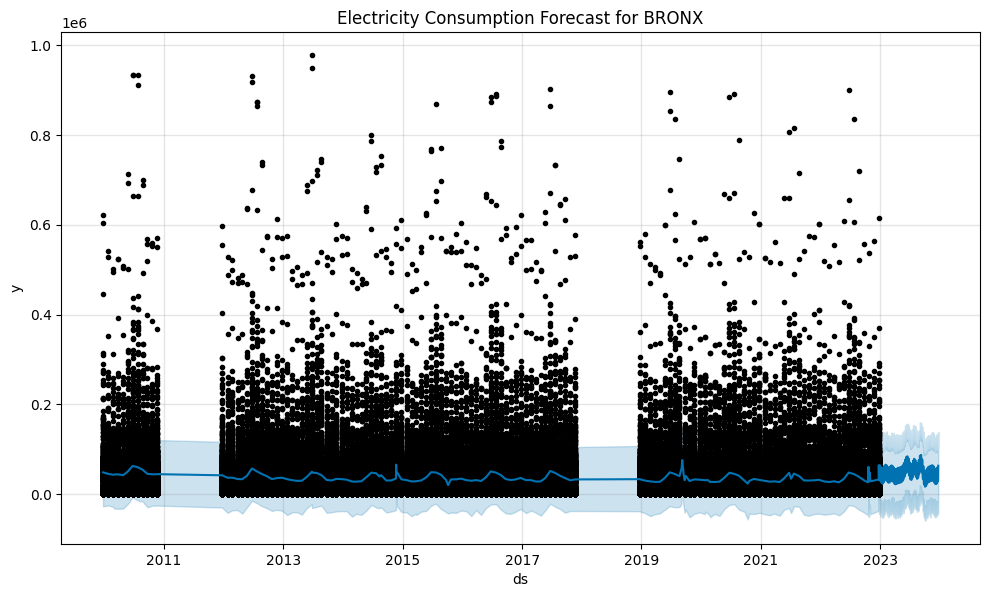


--- Predicting for BROOKLYN ---


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc4chj056/l2tczuge.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc4chj056/ugqwvdgz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48705', 'data', 'file=/tmp/tmpc4chj056/l2tczuge.json', 'init=/tmp/tmpc4chj056/ugqwvdgz.json', 'output', 'file=/tmp/tmpc4chj056/prophet_model8442wz3x/prophet_model-20241210080058.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:00:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:01:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


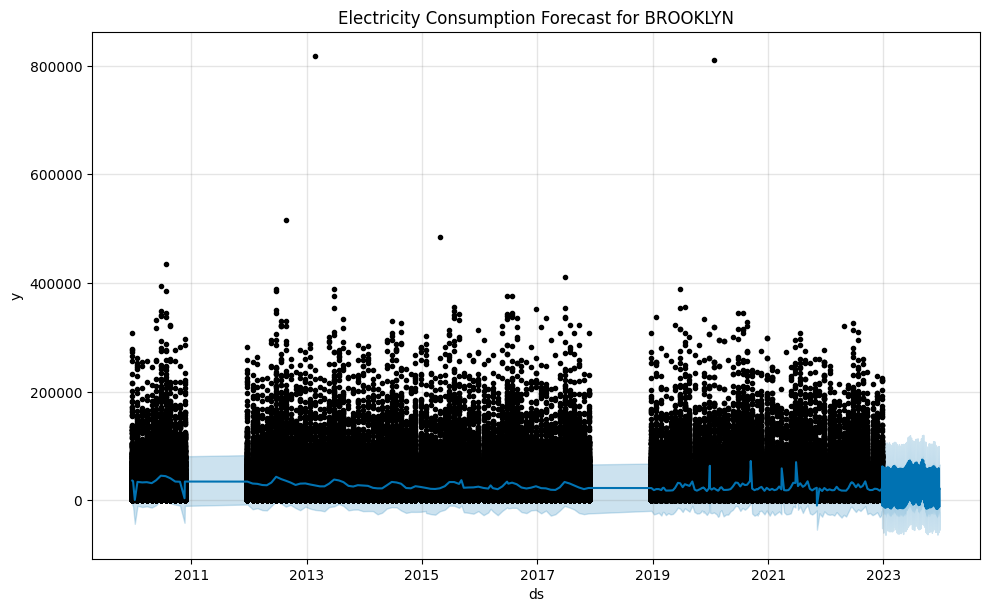


--- Predicting for MANHATTAN ---


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc4chj056/542qitau.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc4chj056/gkh_ooci.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68032', 'data', 'file=/tmp/tmpc4chj056/542qitau.json', 'init=/tmp/tmpc4chj056/gkh_ooci.json', 'output', 'file=/tmp/tmpc4chj056/prophet_modelzzvpg7mw/prophet_model-20241210080143.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:01:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:01:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


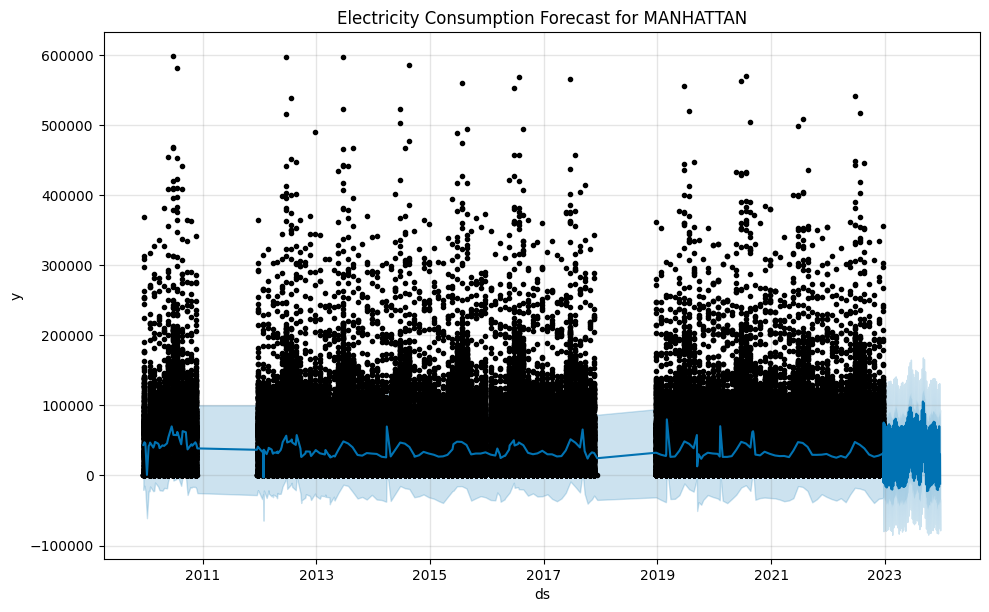

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



--- Predicting for QUEENS ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpc4chj056/z_oa713j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc4chj056/r99mavz9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31214', 'data', 'file=/tmp/tmpc4chj056/z_oa713j.json', 'init=/tmp/tmpc4chj056/r99mavz9.json', 'output', 'file=/tmp/tmpc4chj056/prophet_modeluh861ukr/prophet_model-20241210080204.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:02:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:02:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


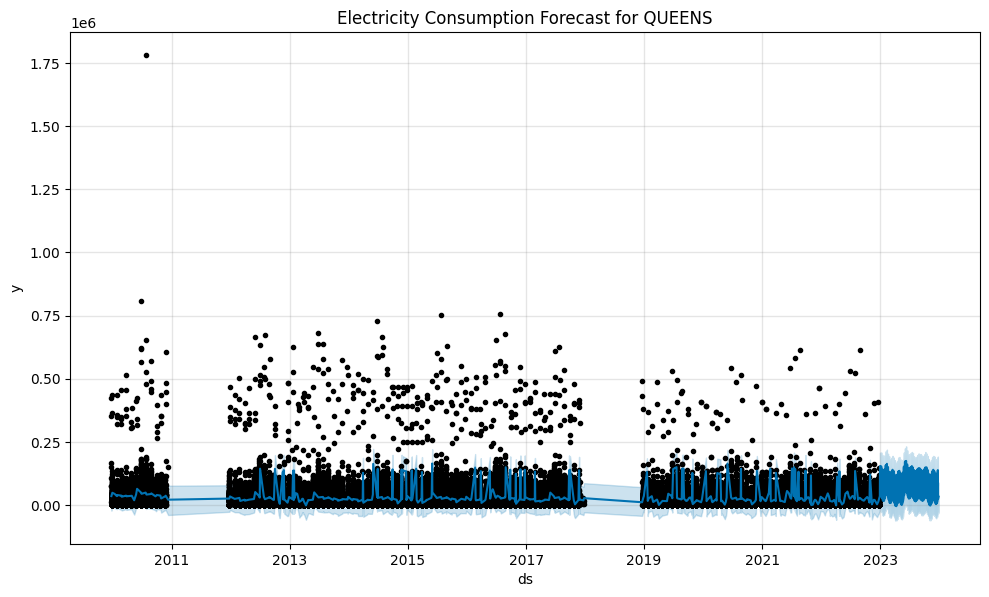

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc4chj056/ell6ryrv.json



--- Predicting for STATEN ISLAND ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpc4chj056/d7ow16xw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47301', 'data', 'file=/tmp/tmpc4chj056/ell6ryrv.json', 'init=/tmp/tmpc4chj056/d7ow16xw.json', 'output', 'file=/tmp/tmpc4chj056/prophet_modelm12oqqhz/prophet_model-20241210080220.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:02:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:02:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


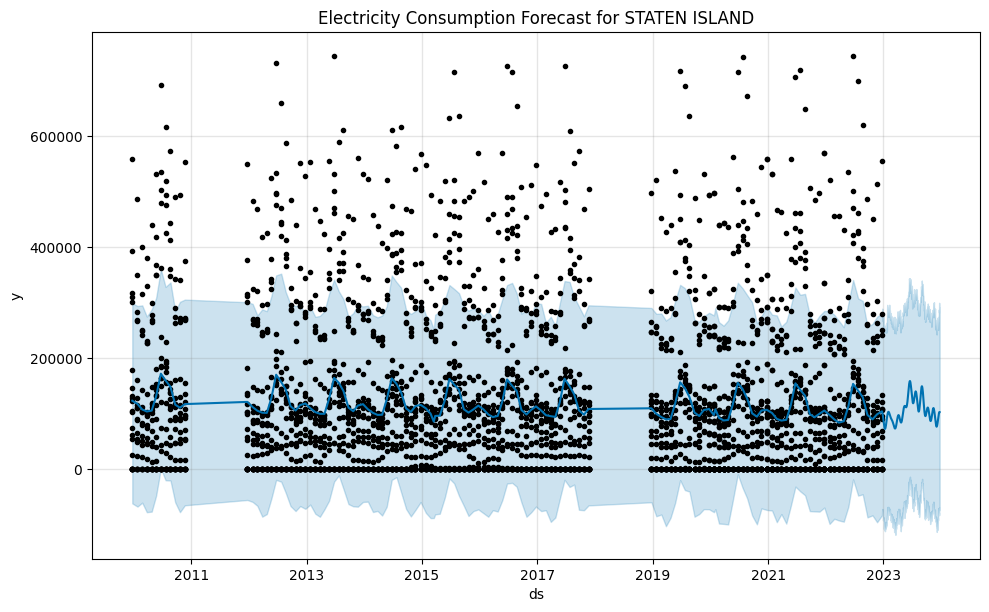

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc4chj056/thqig_so.json



--- Predicting for NON DEVELOPMENT FACILITY ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpc4chj056/19dc5wg8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56355', 'data', 'file=/tmp/tmpc4chj056/thqig_so.json', 'init=/tmp/tmpc4chj056/19dc5wg8.json', 'output', 'file=/tmp/tmpc4chj056/prophet_modela51e73rh/prophet_model-20241210080221.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:02:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:02:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


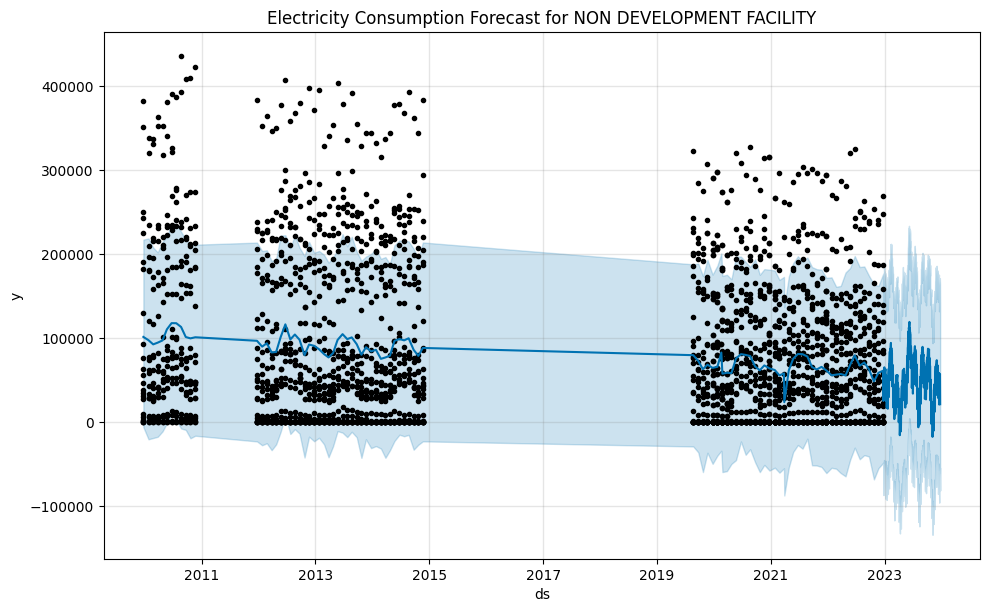

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc4chj056/8su0475g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc4chj056/opgrwnmi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45703', 'data', 'file=/tmp/tmpc4chj056/8su0475g.json', 'init=/tmp/tmpc4chj056/opgrwnmi.json', 'output', 'file=/tmp/tmpc4chj056/prophet_modelm3cbk65u/prophet_model-20241210080222.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:02:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



--- Predicting for FHA ---


08:02:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


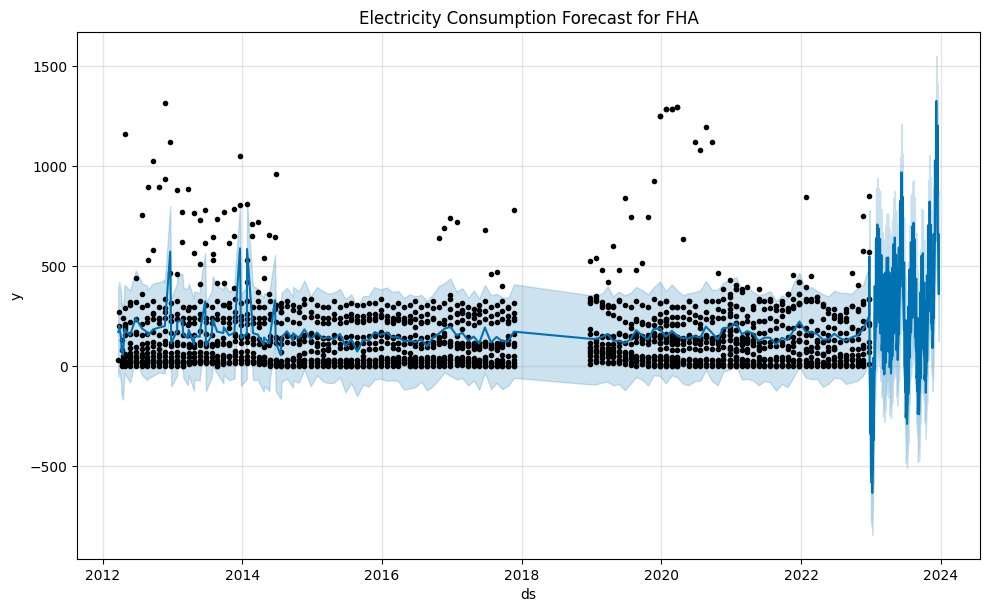

In [136]:
# Loop through each borough
for borough in boroughs:
    print(f"\n--- Predicting for {borough} ---")

    # Filter data for the current borough
    borough_data = data1[data1['Borough'] == borough].copy()

    # Drop rows with missing values in the 'ds' column
    borough_data.dropna(subset=['ds'], inplace=True)  # Add this line to drop NaNs

    # Drop missing values and aggregate by day
    #borough_data = borough_data.groupby('ds')['y'].sum().reset_index()

    # Fit the Prophet model
    model = Prophet(yearly_seasonality=True, growth='linear')
    model.fit(borough_data)

    # Create a dataframe for future predictions (next 365 days)
    future = model.make_future_dataframe(periods=365, freq='D')
    forecast = model.predict(future)

    # Plot the forecast
    fig = model.plot(forecast)
    plt.title(f"Electricity Consumption Forecast for {borough}")
    plt.show()

    # Evaluate the model
    y_true = borough_data['y']
    y_pred = forecast.loc[:len(y_true)-1, 'yhat']